# CAPM

In [8]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk

In [2]:
data = pd.read_csv('Data_PCLab1_Stock.csv')

In [3]:
data.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [4]:
def returns_f(d):
    r = pd.DataFrame()
    r['Date'] = d['Date'][1:]
    for i in range(len(d.columns) - 1):
        r[d.columns[i+1]] = np.zeros(len(d['Date'])-1)
    for i in range(1, len(d['Date'])):
        r.iloc[i-1, 1:] = (d.iloc[i, 1:]-d.iloc[i-1, 1:])/d.iloc[i-1, 1:]
    return r

In [5]:
r = returns_f(data)

# Task 1

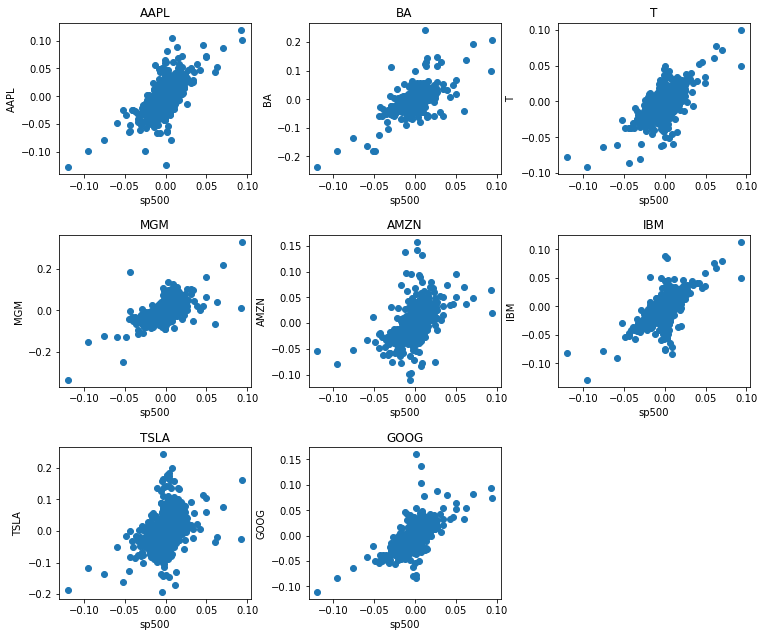

In [7]:
plt.figure(figsize=(12, 10))
for i in range(8):
    plt.subplot(3,3,i+1).set_title(r.columns[i+1])
    plt.scatter(r['sp500'], r[r.columns[i+1]])
    plt.xlabel('sp500')
    plt.ylabel(r.columns[i+1])
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

# Task 2

In [48]:
from sklearn.linear_model import LinearRegression as lr
import statsmodels.api as sm

In [78]:
#OLS
coefs = pd.DataFrame()
X = r['sp500']
X = sm.add_constant(X)
alphas = []
betas = []

for i in range(8):
    mod = sm.OLS(r[r.columns[i+1]], X) 
    reg = mod.fit()
    col = [round(reg.params.values[0], 3)] + [round(reg.pvalues.values[0],3)] + [round(reg.params.values[1], 3)] + [round(reg.pvalues.values[1],3)]
    betas.append(reg.params.values[1])
    alphas.append(reg.params.values[0])
    coefs[r.columns[i+1]] = col

coefs = coefs.rename({0:'Intercept', 1: 'p-value', 2:'Coefficient', 3: 'p-value'}, axis = 0)

In [79]:
coefs

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
Intercept,0.001,-0.000,-0.000,-0.000,0.001,-0.001,0.002,0.000
p-value,0.067,0.951,0.183,0.713,0.004,0.015,0.010,0.181
Coefficient,1.113,1.383,0.745,1.654,0.992,0.960,1.269,1.035
p-value,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


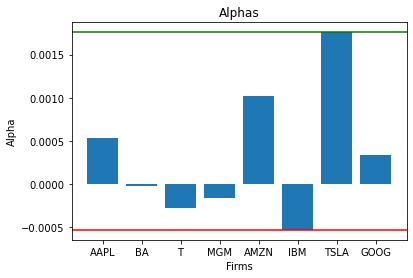

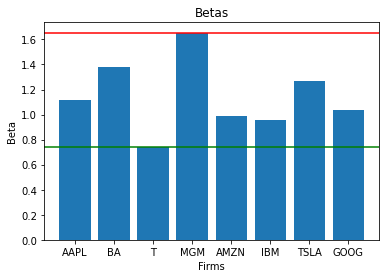

In [88]:
stocks = coefs.columns

plt.bar(stocks, alphas)
plt.axhline(max(alphas), color = 'green')
plt.axhline(min(alphas), color = 'red')
plt.title('Alphas')
plt.xlabel('Firms')
plt.ylabel('Alpha')
plt.show()

plt.bar(stocks, betas)
plt.axhline(max(betas), color = 'red')
plt.axhline(min(betas), color = 'green')
plt.title('Betas')
plt.xlabel('Firms')
plt.ylabel('Beta')
plt.show()

In [93]:
#Residuals

residuals = pd.DataFrame()

for i in range(8):
    stock = stocks[i]
    beta = betas[i]
    alpha = alphas[i]
    predictions = alpha + beta*r['sp500']
    residuals[stock] = predictions - r[stock]

In [94]:
residuals.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
1,-0.001229,0.005186,-0.002310,-0.026488,-0.018038,0.002412,0.188756,0.002598
2,-0.007166,-0.003689,-0.003626,0.013803,-0.013613,-0.001811,-0.160912,-0.001734
3,0.002506,0.017730,0.005341,-0.020985,-0.030789,0.004189,0.007956,0.004941
4,0.009194,0.000145,0.000424,0.002499,-0.020526,0.007246,0.009889,-0.005078
5,0.018690,0.001432,-0.002746,0.013438,0.019789,-0.044208,0.008588,0.084802


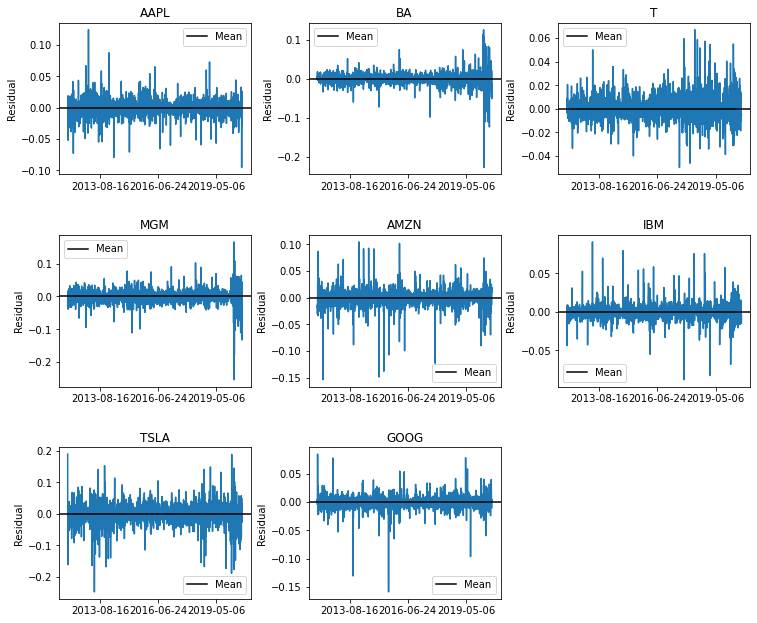

In [121]:
#Residuals Plot
plt.figure(figsize=(12, 10))
for i in range(8):
    plt.subplot(3,3,i+1).set_title(r.columns[i+1])
    plt.plot(r['Date'], residuals[r.columns[i+1]])
    plt.xticks([r['Date'][i] for i in range(400, len(r['Date']), len(r['Date'])//3)])
    plt.axhline(residuals[r.columns[i+1]].mean(), color = 'black', label = 'Mean')
    plt.legend()
    plt.ylabel('Residual')
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

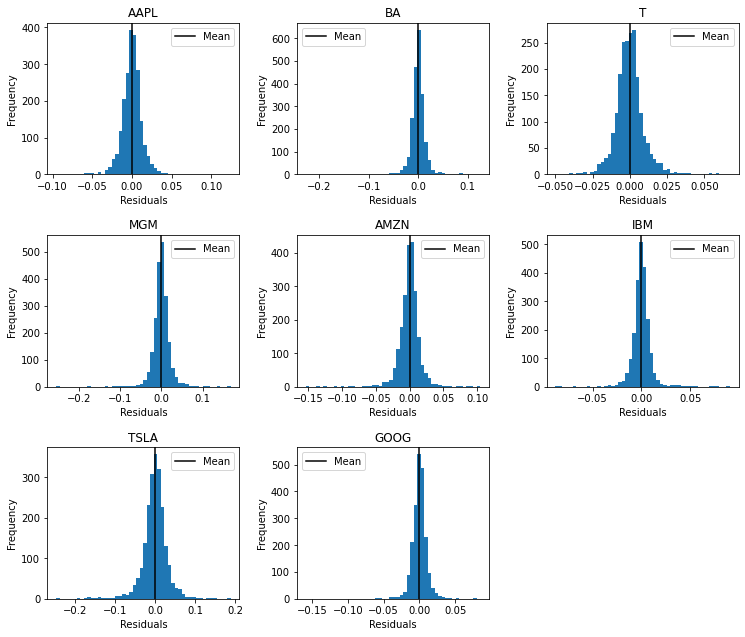

In [134]:
#Residuals Histograms
plt.figure(figsize=(12, 10))
for i in range(8):
    plt.subplot(3,3,i+1).set_title(r.columns[i+1])
    plt.hist(residuals[r.columns[i+1]], bins = 50)
    plt.axvline(residuals[r.columns[i+1]].mean(), color = 'black', label = 'Mean')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.legend()
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

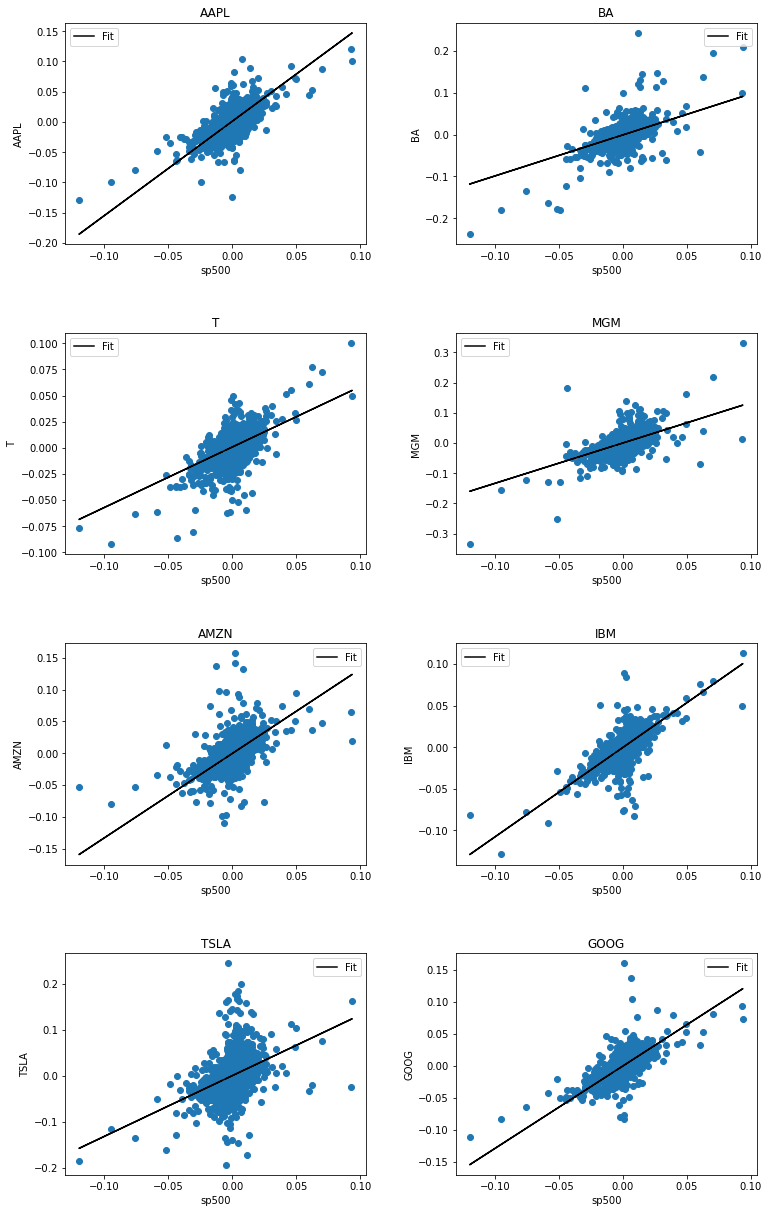

In [232]:
plt.figure(figsize=(12, 20))
for i in range(8):
    plt.subplot(4,2,i+1).set_title(r.columns[i+1])
    plt.scatter(r['sp500'], r[r.columns[i+1]])
    predictions = alphas[i] + betas[i]*r['sp500']
    plt.plot(r['sp500'], predictions, color = 'black', label = 'Fit')
    plt.xlabel('sp500')
    plt.legend()
    plt.ylabel(r.columns[i+1])
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

In [130]:
#To find the riskier assets
summary = pd.DataFrame()
summary['Stocks'] = stocks
summary['Betas'] = betas
summary['Alphas'] = alphas
summary.sort_values('Betas', ascending = 'False')

,Stocks,Betas,Alphas
2,T,0.744630,-0.000286
5,IBM,0.960416,-0.000535
4,AMZN,0.991732,0.001023
7,GOOG,1.034881,0.000334
0,AAPL,1.112891,0.000528
6,TSLA,1.268611,0.001759
1,BA,1.382867,-0.000023
3,MGM,1.653568,-0.000169


In [131]:
r['Risky'] = 0.25*(r['AAPL'] + r['TSLA'] + r['BA'] + r['MGM'])
r.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,ones,Risky
1,2012-01-13,-0.003749,-0.012051,-0.001660,0.018137,0.014153,-0.007699,-0.193274,-0.007385,-0.004948,1,-0.047735
2,2012-01-17,0.011648,0.008579,0.005986,-0.008097,0.018159,0.004689,0.167179,0.005744,0.003553,1,0.044827
3,2012-01-18,0.010384,-0.002392,0.002645,0.039184,0.042827,0.005944,0.007895,0.006889,0.011108,1,0.013767
4,2012-01-19,-0.003169,0.006661,0.002967,0.005499,0.026446,-0.003038,-0.001865,0.010523,0.004939,1,0.001781
5,2012-01-20,-0.017417,-0.000529,0.002959,-0.012500,-0.018102,0.044316,-0.005979,-0.083775,0.000669,1,-0.009106


In [164]:
rm = (1 + r['sp500'].mean())**365 - 1
risky = ['MGM', 'BA', 'TSLA', 'AAPL']
returns = []
for i in range(len(risky)):
    r_i = float(summary.loc[summary['Stocks'] == risky[i], 'Betas'])*rm + float(summary.loc[summary['Stocks'] == risky[i], 'Alphas'])
    returns.append(r_i)

print(returns)
print(np.mean(returns))

[0.32602738920435137, 0.27277275382230576, 0.2520157879938643, 0.22006638353518743]
0.26772057863892723


# Task 3

In [143]:
for i in range(len(r['Date'])):
    r.loc[r.index[i], 'year'] = int(r.loc[r.index[i], 'Date'][0:4])

In [144]:
r.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,ones,Risky,year
1,2012-01-13,-0.003749,-0.012051,-0.001660,0.018137,0.014153,-0.007699,-0.193274,-0.007385,-0.004948,1,-0.047735,2012.0
2,2012-01-17,0.011648,0.008579,0.005986,-0.008097,0.018159,0.004689,0.167179,0.005744,0.003553,1,0.044827,2012.0
3,2012-01-18,0.010384,-0.002392,0.002645,0.039184,0.042827,0.005944,0.007895,0.006889,0.011108,1,0.013767,2012.0
4,2012-01-19,-0.003169,0.006661,0.002967,0.005499,0.026446,-0.003038,-0.001865,0.010523,0.004939,1,0.001781,2012.0
5,2012-01-20,-0.017417,-0.000529,0.002959,-0.012500,-0.018102,0.044316,-0.005979,-0.083775,0.000669,1,-0.009106,2012.0


In [305]:
#CAPM Theory Test

years = [i for i in range(2012, 2021)]
differences = []
all_betas = []
all_actual_returns = []
all_predictions = []

for i in range(8):
    past_r = r[r['year'] == years[i]]
    betas = []
    alphas = []
    X = past_r['sp500']
    X = sm.add_constant(X)
    for j in range(8):
        mod = sm.OLS(past_r[past_r.columns[j+1]], X) 
        reg = mod.fit()
        betas.append(reg.params.values[1])
        alphas.append(reg.params.values[0])
    
    all_betas.append(betas)
    
    current_r = r[(r['year'] == years[i+1])]
    #print(current_r['sp500'])
    r_mkt = (1 + current_r['sp500'].mean())**252 - 1
    #print(r_mkt)
    #rm = current_r['sp500'].mean()
    actual_returns = []
    predictions = []
    
    for k in range(8):
        prediction = ((1 + current_r['sp500']*betas[k] + alphas[k]).mean())**252 - 1
        predictions.append(prediction)
        actual_returns.append((1 + current_r[current_r.columns[k+1]].mean())**252 - 1)
        #actual_returns.append(current_r[r.columns[i+1]].mean())
        #predictions.append(alphas[i] + betas[i]*rm)
    
    all_actual_returns.append(actual_returns)
    all_predictions.append(predictions)
    difference = np.array(predictions) - np.array(actual_returns)
    differences.append(difference)
    
deviations = pd.DataFrame()
for i in range(8):
    deviations[years[i]] = differences[i]

for i in range(8):
    deviations = deviations.rename({i:r.columns[i+1]}, axis = 0)

deviations

,2012,2013,2014,2015,2016,2017,2018,2019
AAPL,0.531618,-0.410512,0.298358,-0.029020,-0.259331,0.111339,-0.490992,-0.590718
BA,-0.658757,0.630417,-0.271322,0.143299,-0.705302,0.383920,0.675227,0.278751
T,0.195530,-0.027661,-0.130221,-0.138366,0.370562,0.024232,-0.466912,0.579244
MGM,-0.767162,0.721737,-0.335975,-0.018990,0.334089,0.081815,-0.236017,0.245108
AMZN,0.164851,0.540904,-1.599845,1.396354,-0.327276,-0.192067,1.010033,-1.429922
IBM,0.236391,0.019582,-0.076130,-0.263298,0.390620,0.039217,-0.172364,0.032416
TSLA,-3.742818,2.988906,0.183195,0.335292,-0.493416,-0.128754,0.522730,-9.695178
GOOG,-0.295301,0.443917,-0.671564,0.632940,-0.252987,-0.002916,0.249208,-0.161779


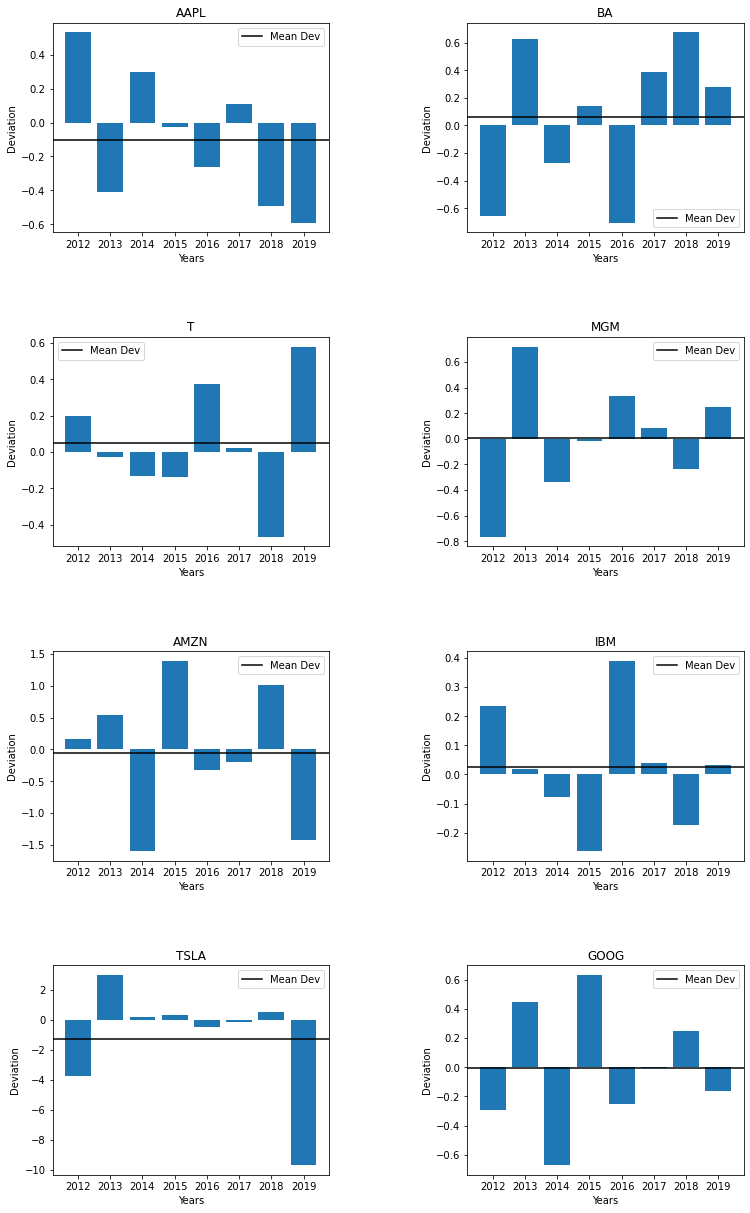

In [306]:
#Deviation: Years
plt.figure(figsize=(12, 20))
for i in range(8):
    plt.subplot(4,2,i+1).set_title(r.columns[i+1])
    plt.bar(years[:-1], deviations.loc[stocks[i], :])
    plt.axhline(np.mean(deviations.loc[stocks[i], :]), color = 'black', label = 'Mean Dev')
    plt.legend()
    plt.xlabel('Years')
    plt.ylabel('Deviation')
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

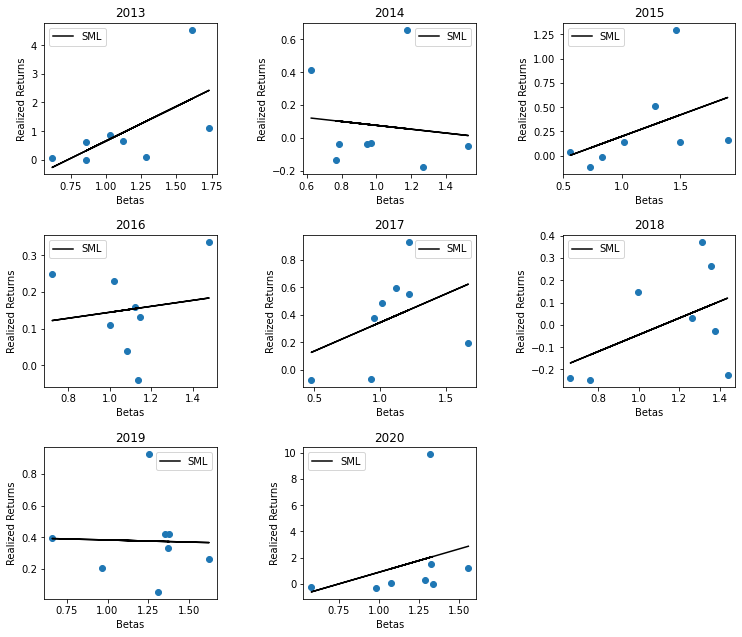

In [307]:
#SML: Years
plt.figure(figsize=(12, 10))
for i in range(8):
    X = all_betas[i]
    X = sm.add_constant(X)
    mod = sm.OLS(all_actual_returns[i], X) 
    reg = mod.fit()
    plt.subplot(3,3,i+1).set_title(str(2013 + i))
    plt.scatter(all_betas[i], all_actual_returns[i])
    plt.plot(all_betas[i], mod.predict(reg.params, X), color = 'black', label = 'SML')
    plt.legend()
    plt.xlabel('Betas')
    plt.ylabel('Realized Returns')
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)
plt.show()

# Task 3.5

In [329]:
for i in range(len(r['Date'])):
    r.loc[r.index[i], 'month'] = int(r.loc[r.index[i], 'Date'][5:7])

In [330]:
r.loc[(r['month'] >= 1) & (r['month'] <= 6), 'Semester'] = 1
r.loc[(r['month'] >= 7) & (r['month'] <= 12), 'Semester'] = 2
r.loc[(r['month'] >= 1) & (r['month'] <= 3), 'Quarter'] = 1
r.loc[(r['month'] >= 4) & (r['month'] <= 6), 'Quarter'] = 2
r.loc[(r['month'] >= 7) & (r['month'] <= 9), 'Quarter'] = 3
r.loc[(r['month'] >= 10) & (r['month'] <= 12), 'Quarter'] = 4

In [331]:
#Semester Generation
for i in range(len(years)):
    r.loc[(r['year'] == years[i]), 'quarter'] = 2*i +  r.loc[(r['year'] == years[i]), 'Semester']

In [332]:
#CAPM Theory Test: Semesters

differences = []
all_betas = []
all_actual_returns = []
all_predictions = []

for i in range(1,18):
    past_r = r[r['semester'] == i]
    betas = []
    alphas = []
    X = past_r['sp500']
    X = sm.add_constant(X)
    for j in range(8):
        mod = sm.OLS(past_r[past_r.columns[j+1]], X) 
        reg = mod.fit()
        betas.append(reg.params.values[1])
        alphas.append(reg.params.values[0])
    
    all_betas.append(betas)
    
    current_r = r[r['semester'] == i+1]
    r_mkt = (1 + current_r['sp500'].mean())**126 - 1
    actual_returns = []
    predictions = []
    
    for k in range(8):
        prediction = ((1 + current_r['sp500']*betas[k] + alphas[k]).mean())**126 - 1
        predictions.append(prediction)
        actual_returns.append((1 + current_r[current_r.columns[k+1]].mean())**126 - 1)
    
    all_actual_returns.append(actual_returns)
    all_predictions.append(predictions)
    difference = np.array(predictions) - np.array(actual_returns)
    differences.append(difference)
    
deviations = pd.DataFrame()
for i in range(17):
    deviations[i+1] = differences[i]

for i in range(8):
    deviations = deviations.rename({i:r.columns[i+1]}, axis = 0)

deviations

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
AAPL,0.507826,0.269065,-0.656463,0.215496,-0.026259,-0.012729,0.285209,-0.028894,-0.263136,-0.019423,0.098363,-0.056513,0.128955,-0.052714,-0.351657,-0.009730,-0.448546
BA,-0.039688,-0.293102,0.058945,0.294224,-0.101424,-0.090962,0.016518,0.175082,-0.246743,-0.056988,-0.198109,0.255644,0.040344,0.179628,0.136697,0.093848,0.347601
T,0.248799,-0.050609,0.074064,-0.072379,0.050719,-0.135164,0.084356,-0.262369,0.287497,0.113604,-0.144281,0.124556,-0.116408,-0.126310,-0.028407,0.297327,0.067319
MGM,-0.146478,-0.103016,-0.254203,0.304532,0.304712,-0.098337,-0.420281,0.319802,-0.181040,0.199228,0.058062,0.089262,-0.070736,0.039776,-0.089419,0.330079,-2.004416
AMZN,0.237347,0.105560,-0.301544,0.446002,-0.158991,-0.516394,-0.150100,0.556577,0.076917,-0.224004,0.097899,-0.415791,0.406695,0.208459,0.170234,-0.661504,0.179620
IBM,0.102790,0.047313,0.031789,-0.034394,0.069434,-0.156277,0.155081,-0.231136,0.056796,0.182990,-0.060817,0.043366,0.008290,-0.198107,0.156250,-0.064765,0.070010
TSLA,0.060981,-2.364998,2.132154,-0.304697,0.721740,-0.340113,0.292241,0.047799,-0.053459,-0.706720,0.896865,-0.381015,-0.070579,0.788344,-1.321547,-1.543472,1.314446
GOOG,-0.313384,0.057005,-0.005844,0.146183,0.100876,-0.121326,-0.500366,0.632206,-0.168361,-0.047143,0.055422,-0.032377,-0.000751,0.241136,-0.279774,0.003225,0.233245


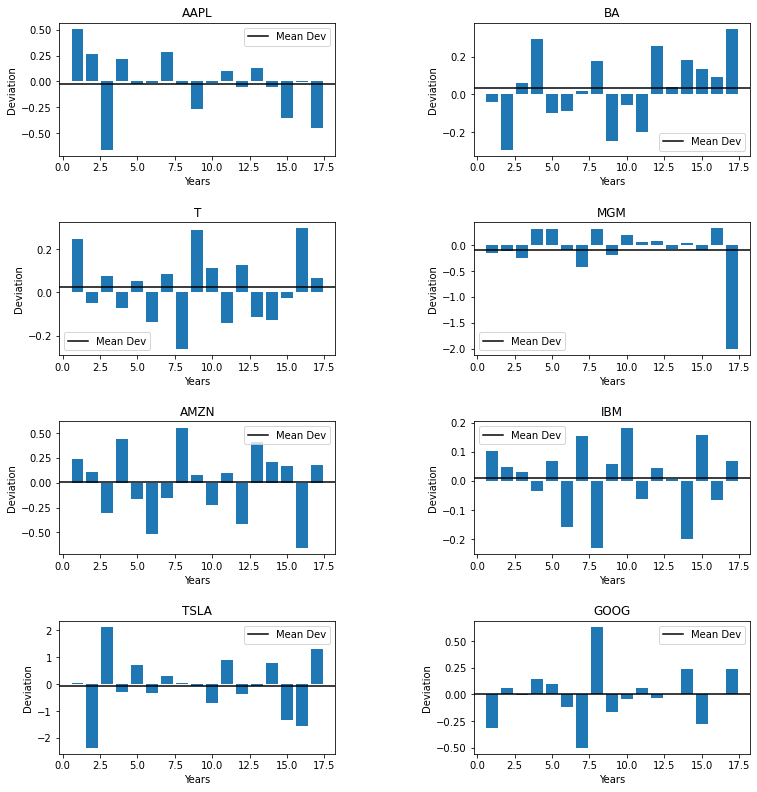

In [333]:
#Deviation: Semesters
semesters = [i for i in range(1,18)]
plt.figure(figsize=(12, 30))
for i in range(8):
    plt.subplot(9,2,i+1).set_title(r.columns[i+1])
    plt.bar(semesters, deviations.loc[stocks[i], :])
    plt.axhline(np.mean(deviations.loc[stocks[i], :]), color = 'black', label = 'Mean Dev')
    plt.legend()
    plt.xlabel('Years')
    plt.ylabel('Deviation')
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

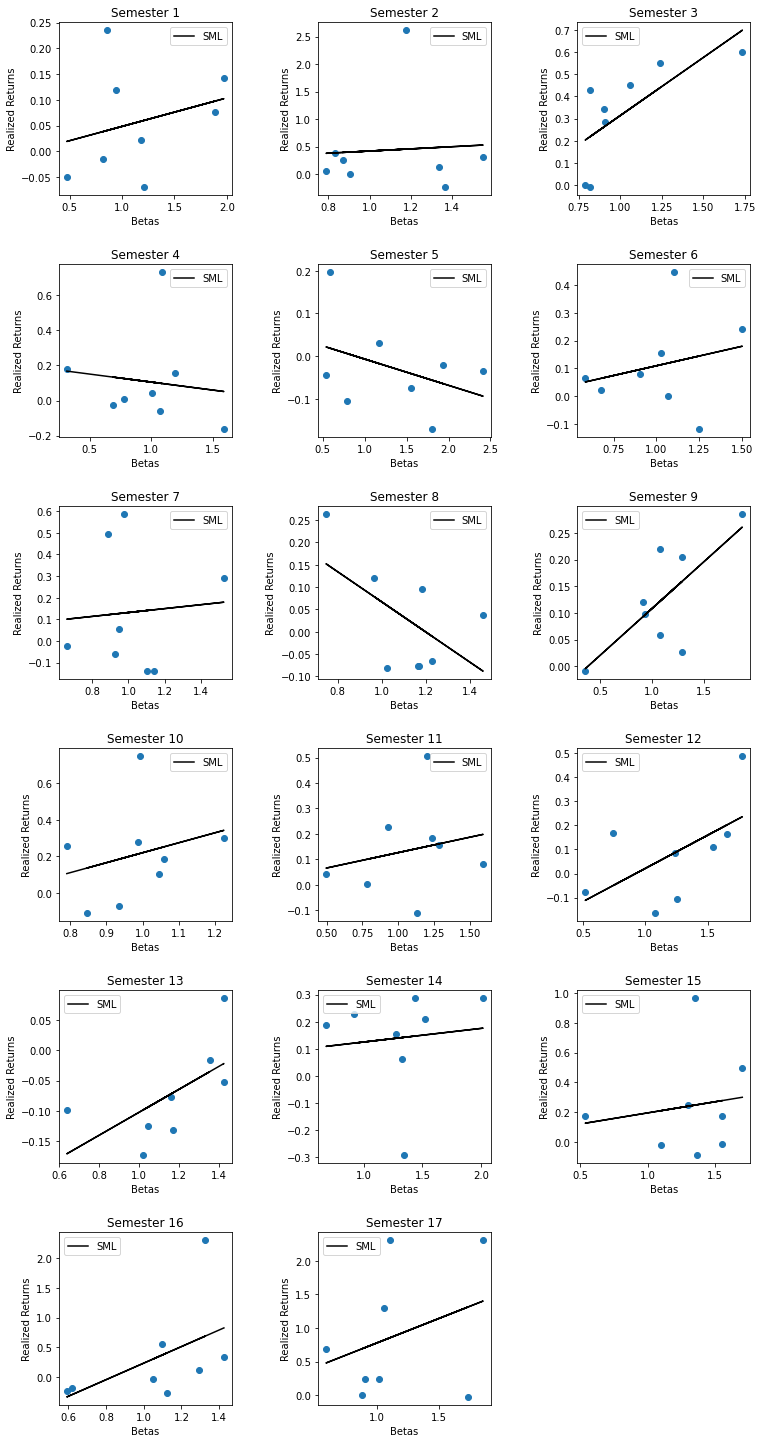

In [334]:
#SML: Semesters

plt.figure(figsize=(12, 24))
for i in range(17):
    X = all_betas[i]
    X = sm.add_constant(X)
    mod = sm.OLS(all_actual_returns[i], X) 
    reg = mod.fit()
    plt.subplot(6,3,i+1).set_title('Semester ' + str(i+1))
    plt.scatter(all_betas[i], all_actual_returns[i])
    plt.plot(all_betas[i], mod.predict(reg.params, X), color = 'black', label = 'SML')
    plt.legend()
    plt.xlabel('Betas')
    plt.ylabel('Realized Returns')
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)
plt.show()

In [335]:
#Quarters Generation
for i in range(len(years)):
    r.loc[(r['year'] == years[i]), 'quarter'] = 4*i +  r.loc[(r['year'] == years[i]), 'Quarter']

In [336]:
#CAPM Theory Test: Quarters

differences = []
all_betas = []
all_actual_returns = []
all_predictions = []

for i in range(1,35):
    past_r = r[r['quarter'] == i]
    betas = []
    alphas = []
    X = past_r['sp500']
    X = sm.add_constant(X)
    for j in range(8):
        mod = sm.OLS(past_r[past_r.columns[j+1]], X) 
        reg = mod.fit()
        betas.append(reg.params.values[1])
        alphas.append(reg.params.values[0])
    
    all_betas.append(betas)
    
    current_r = r[r['quarter'] == i+1]
    r_mkt = (1 + current_r['sp500'].mean())**63 - 1
    actual_returns = []
    predictions = []
    
    for k in range(8):
        prediction = ((1 + current_r['sp500']*betas[k] + alphas[k]).mean())**63- 1
        predictions.append(prediction)
        actual_returns.append((1 + current_r[current_r.columns[k+1]].mean())**63 - 1)
    
    all_actual_returns.append(actual_returns)
    all_predictions.append(predictions)
    difference = np.array(predictions) - np.array(actual_returns)
    differences.append(difference)
    
deviations = pd.DataFrame()
for i in range(34):
    deviations[i+1] = differences[i]

for i in range(8):
    deviations = deviations.rename({i:r.columns[i+1]}, axis = 0)

deviations

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
AAPL,0.351083,-0.047387,0.281268,0.143792,-0.124286,-0.291894,0.047961,0.184725,-0.245660,0.089642,...,-0.065375,-0.076390,0.224327,-0.176533,-0.013980,-0.125639,-0.052010,0.020725,-0.067378,-0.102802
BA,-0.133461,0.186443,-0.205041,0.027358,-0.108429,0.068844,0.055334,0.157124,-0.059616,-0.033729,...,0.157122,-0.015945,-0.067862,0.042201,0.111471,-0.125359,0.232896,0.195974,-0.407177,0.314709
T,-0.173179,0.132806,0.121022,-0.107557,0.044479,0.025496,-0.052823,-0.027687,0.014688,0.003641,...,0.035490,-0.121060,0.232994,-0.053720,-0.002104,-0.078518,0.147320,0.123305,0.004664,0.017515
MGM,0.022541,-0.009505,-0.243414,0.099879,-0.107135,-0.196318,0.307531,-0.066277,0.141615,0.091516,...,0.266684,-0.082782,-0.252640,0.275992,-0.185096,0.102604,-0.145262,0.457785,-0.763504,-0.333685
AMZN,-0.050199,0.135448,0.020947,0.058236,-0.044538,-0.053125,-0.081955,0.265355,-0.085634,-0.115763,...,0.128370,0.071513,0.070873,0.159387,-0.029678,0.110124,-0.069556,-0.255959,-0.071547,0.110342
IBM,0.167481,-0.047164,0.071527,-0.108821,0.145531,-0.053622,-0.013982,-0.067514,0.117862,-0.126784,...,0.130910,-0.129570,0.168130,-0.278186,0.168871,-0.107457,0.217910,-0.134678,0.128929,-0.048552
TSLA,0.214352,0.052934,-0.298448,0.150852,-2.054846,1.243178,1.160136,-0.697077,0.389998,0.049553,...,-0.410080,0.613580,-0.799244,1.069106,-0.030517,-0.324345,-0.526921,0.159212,0.072062,0.299209
GOOG,0.035825,-0.318547,0.300275,-0.088682,-0.057930,0.135377,-0.244700,0.187139,0.001046,-0.045383,...,-0.032453,0.073734,-0.154166,0.108678,0.082285,-0.233627,0.145880,-0.103464,0.022894,0.081968


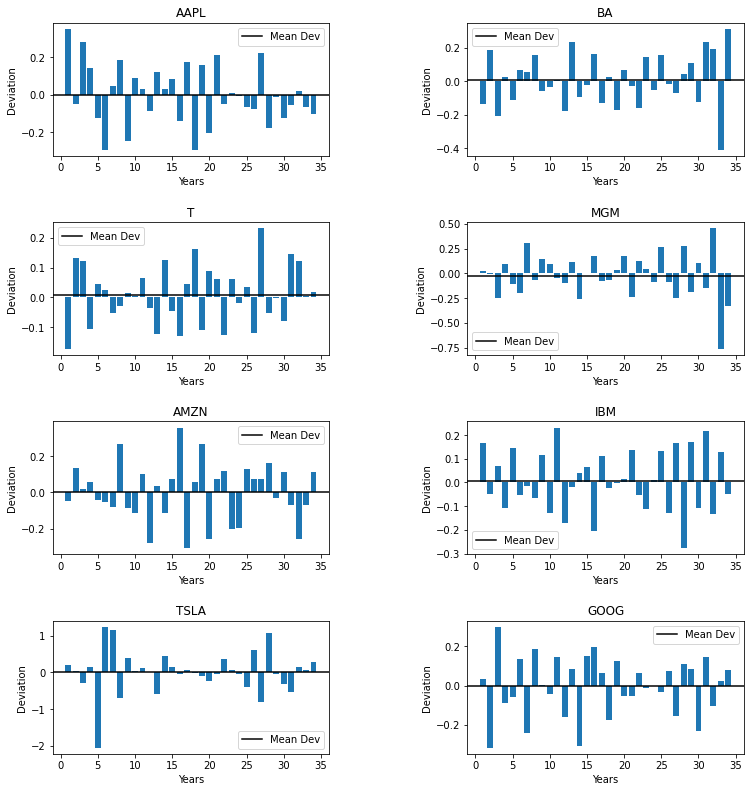

In [337]:
#Deviation: Quarters
quarters = [i for i in range(1,35)]
plt.figure(figsize=(12, 30))
for i in range(8):
    plt.subplot(9,2,i+1).set_title(r.columns[i+1])
    plt.bar(quarters, deviations.loc[stocks[i], :])
    plt.axhline(np.mean(deviations.loc[stocks[i], :]), color = 'black', label = 'Mean Dev')
    plt.legend()
    plt.xlabel('Years')
    plt.ylabel('Deviation')
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
plt.show()